In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
inspector = inspect(engine)

In [16]:
inspector.get_table_names()

['measurement', 'station']

In [17]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
session.query(Station.station, Station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [20]:
session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [21]:
## TO FIND LAST 12 MONTHS OF DATA...

#query for dates and find the latest date
latestDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())

#extract string from query object
latestDate = list(np.ravel(latestDate))[0]

#convert date string to datetime object
latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')

#extract year, month, and day as integers
latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestDate, '%m'))
latestDay = int(dt.datetime.strftime(latestDate, '%d'))

#calculate one year before latest date
last12mnths = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prcp_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > last12mnths).\
                    order_by(Measurement.date).statement

df_prcp = pd.read_sql_query(prcp_data, session.bind)
df_prcp.set_index('date', inplace=True)
#df_prcp

In [23]:
prcp_list = df_prcp["prcp"].tolist()

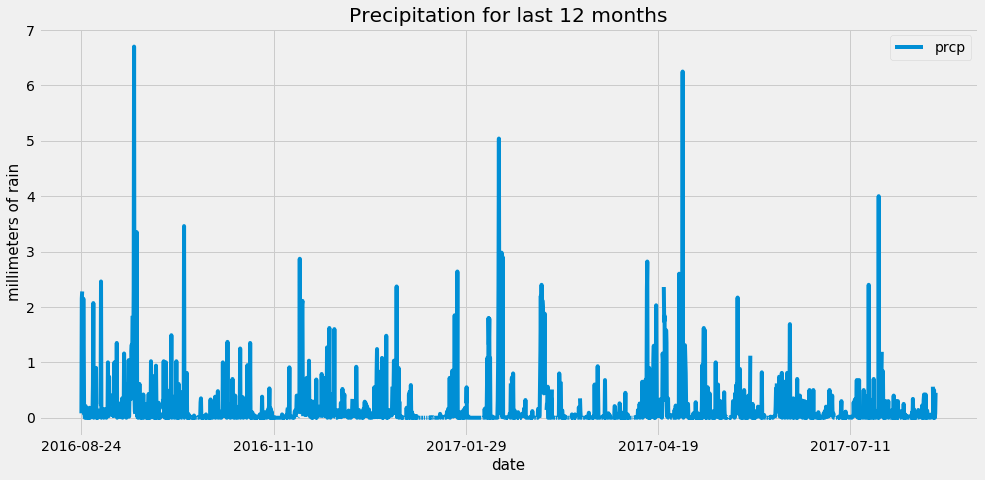

In [29]:
df_prcp.plot(figsize=(15, 7), title="Precipitation for last 12 months")

plt.xlabel('date', fontsize=15)
plt.ylabel('millimeters of rain', fontsize=15)

plt.savefig(f'Precipitation in Hawaii for last 12 months')
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
#-----------------------------------------

In [22]:
# Design a query to show how many stations are available in this dataset

In [32]:
TotalStations = session.query(Station.name).count()
print(TotalStations)

9


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

ActiveStations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
ActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
#-----------------------------------------

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [38]:
station_ID = ActiveStations[0][0]
station_ID

'USC00519281'

In [39]:
temp_data = session.query(func.min(Measurement.tobs),
                               func.max(Measurement.tobs),
                               func.avg(Measurement.tobs)).\
                                filter(Measurement.station == station_ID).all()
temp_data

[(54.0, 85.0, 71.66378066378067)]

In [40]:
# Another Approach to find MAX, MIN, and AVG temps
lowest_temp = engine.execute('SELECT min(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for lowest in lowest_temp:
    print(lowest)

highest_temp = engine.execute('SELECT max(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for highest in highest_temp:
    print(highest)
    
avg_temp = engine.execute('SELECT avg(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for avg in avg_temp:
    print(avg)

(54.0,)
(85.0,)
(71.66378066378067,)


In [28]:
#-----------------------------------------

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [41]:
temp_obs = (session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date > last12mnths).\
                    filter(Measurement.station == station_ID).\
                    order_by(Measurement.date).all())

temp_obs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

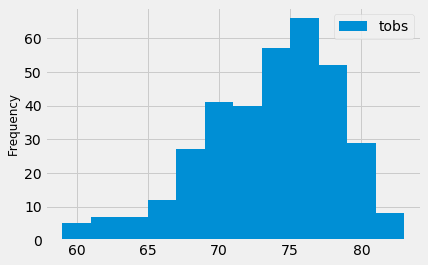

In [44]:
tempObs = pd.DataFrame(temp_obs, columns = ["date", "Temperature"])

tempObs = tempObs.set_index('date')
tempObs = tempObs.sort_index(ascending=True)

tempObs.plot(kind='hist', bins=12)

plt.ylabel('Frequency', fontsize=12)
labels = ['tobs']
plt.legend(labels)

plt.savefig(f'Temp_Histogram_MostActiveStation_last12months')
plt.show()

In [31]:
#-----------------------------------------

In [45]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

tripStartDate = '2016-08-24'
tripEndDate = '2017-08-18'


trip = calc_temps(tripStartDate, tripEndDate)
trip

[(58.0, 74.53786848072562, 87.0)]

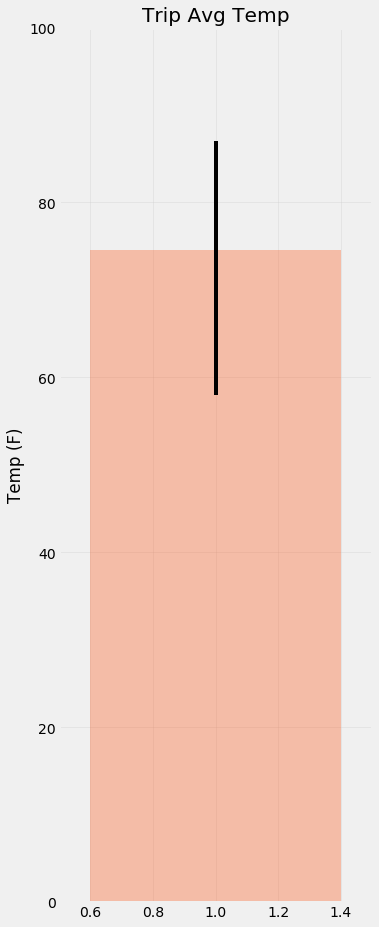

In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

minTripTemp = trip[0][0]
avgTripTemp = trip[0][1]
maxTripTemp = trip[0][2]

minError = avgTripTemp - minTripTemp
maxError = maxTripTemp - avgTripTemp

errorBars = np.array([[minError], [maxError]])

plt.figure(figsize=(5,15))
plt.bar(1, avgTripTemp, yerr=errorBars, color = 'orangered', alpha = .3)
plt.ylim(0, 100)
plt.xlim(0.5, 1.5)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)

plt.savefig(f'Trip_Avg_Temp_last12months')
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using 
#            the previous year's matching dates.
# Sort this in descending order by precipitation amount 
#            and list the station, name, latitude, longitude, and elevation

In [48]:
total_rainfall = (session.query(func.sum(Measurement.prcp),
                              Station.station,
                              Station.name,
                              Station.latitude,
                              Station.longitude,
                              Station.elevation)
                        .filter(Measurement.station == Station.station)
                        .filter(Measurement.date >= tripStartDate)
                        .filter(Measurement.date <= tripEndDate)
                        .group_by(Station.station)
                        .order_by(func.sum(Measurement.prcp).desc()).all())

TotalRainfall = pd.DataFrame(total_rainfall, columns=['Total Rainfall',
                                                      'Station',
                                                      'Name',
                                                      'Latitude',
                                                      'Longitude', 
                                                      'Elevation'])

TotalRainfall

,Total Rainfall,Station,Name,Latitude,Longitude,Elevation
0,145.51,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,68.24,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,48.36,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,37.91,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,33.16,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,16.09,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,4.59,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [52]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [58]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date=dt.date(2016, 3, 1)
end_date=dt.date(2016, 3, 10)

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

date_delta=dt.timedelta(1)
date_list_str=[]
date_list=[]

date=start_date
while date<=end_date:
    date_list_str.append(date.strftime('%m-%d'))
    date_list.append(date)
    date=date+date_delta

# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals_list=[]
for date in date_list_str:
    daily_normals_list.append(daily_normals(date)[0])
    
daily_normals_list


[(64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0),
 (60.0, 69.20338983050847, 76.0),
 (60.0, 69.17241379310344, 78.0),
 (59.0, 68.72413793103448, 78.0),
 (57.0, 68.56140350877193, 75.0),
 (57.0, 69.12280701754386, 75.0)]

In [59]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normals=pd.DataFrame(daily_normals_list, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
trip_normals['Date']=date_list
trip_normals.set_index('Date', drop=True, inplace=True)
trip_normals

,Min Temp,Avg Temp,Max Temp
Date,,,
2016-03-01,64.0,70.032787,76.0
2016-03-02,61.0,70.366667,78.0
2016-03-03,60.0,70.068966,78.0
2016-03-04,57.0,69.272727,77.0
2016-03-05,60.0,67.890909,76.0
2016-03-06,60.0,69.203390,76.0
2016-03-07,60.0,69.172414,78.0
2016-03-08,59.0,68.724138,78.0
2016-03-09,57.0,68.561404,75.0


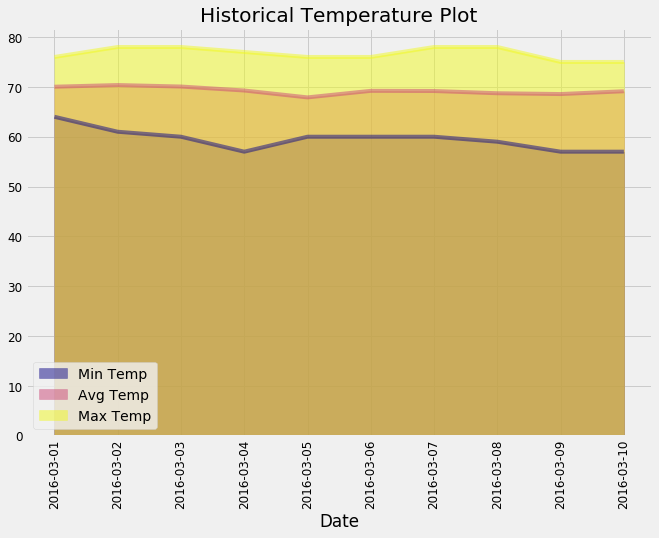

In [70]:
# Plot the daily normals as an area plot with `stacked=False`
trip_normals.plot(kind='area',
                  stacked=False,
                  alpha=0.5,
                  colormap='plasma',
                  title='Historical Temperature Plot',
                  figsize=(10,7),
                  use_index=True,
                  rot=90,
                  fontsize=12)

plt.savefig(f'Daily_normals')
plt.show()